<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20240930_%E5%9B%9E%E5%B8%B0%EF%BC%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/diabetes_train.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.012648,0.050680,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
1,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
2,0.005383,-0.044642,0.059541,-0.056166,0.024574,0.052861,-0.043401,0.050914,-0.004220,-0.030072,91.0
3,0.030811,0.050680,0.056307,0.076958,0.049341,-0.012274,-0.036038,0.071210,0.120053,0.090049,310.0
4,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021394,0.007207,84.0


In [6]:
x = df.drop('target',axis=1).values
t = df['target'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,t)
print(model.score(x,t))


0.5539411781927148


<BarContainer object of 10 artists>

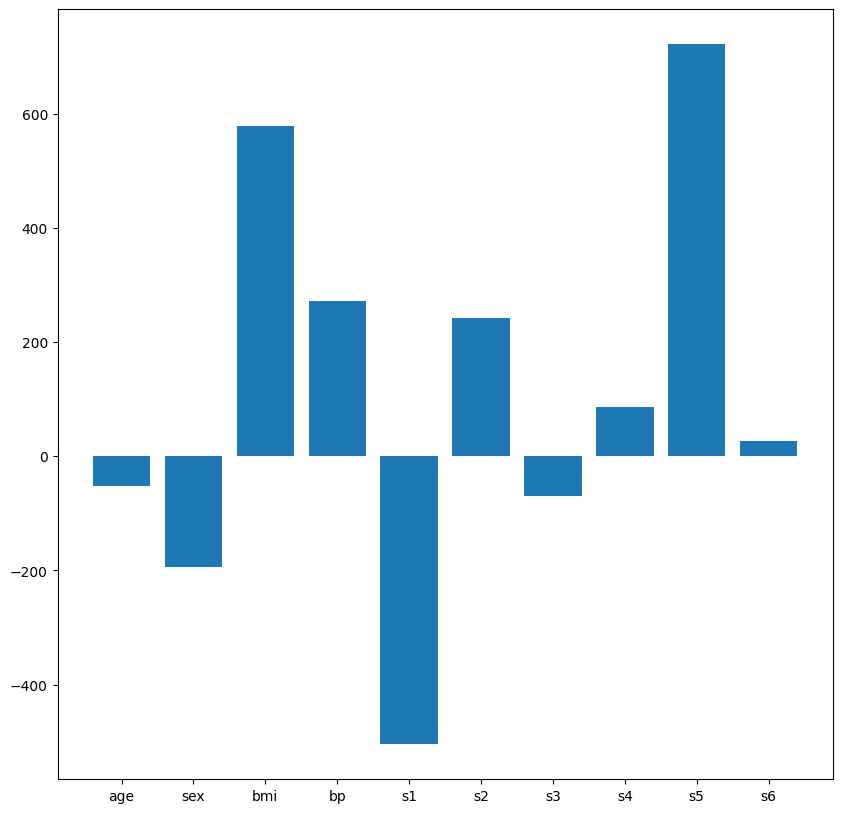

In [15]:
columns = df.columns.tolist()[:-1]
plt.figure(figsize=(10,10))
plt.bar(x=columns, height=model.coef_)

In [10]:
test = pd.read_csv('/content/diabetes_test.csv')
test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.026679,-0.024993,-0.002592,0.003712,0.040343
1,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207
2,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207
3,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357
4,-0.023677,-0.044642,0.045529,0.090730,-0.018080,-0.035447,0.070730,-0.039493,-0.034524,-0.009362


In [16]:
test_x = test.values

In [17]:
y = model.predict(test_x)
y

array([239.6785766 , 250.53141737, 164.84805461, 120.27678545,
       181.73395543, 262.21230671, 112.23276599, 191.94646405,
       151.50037962, 236.97547898, 172.17106886, 181.76776675,
       112.11718447,  93.10535397, 242.61551546,  91.18854011,
       153.66210217,  64.67732159,  99.36843868, 212.25939578,
       197.03895856, 162.46443162, 164.14281795, 157.73824133,
       207.25537379, 170.20342369, 111.97456707,  82.77243482,
       186.91705702, 164.72179002, 175.37310208,  82.34780886,
       144.28954965, 149.22361436, 144.09115907, 194.25825855,
       166.52462404, 188.10488874, 126.97750787, 205.91826796,
        85.53348753, 167.78356048, 147.74549209, 183.84581135,
       177.14794619,  71.92344074, 139.84126287, 139.03021418,
       125.12177811, 231.42294135, 163.79584007,  78.92939231,
       151.43859067, 159.59729648, 237.28907635, 176.12271938,
       191.69740342, 118.93503631, 131.10139145, 174.80265252,
       216.57324581, 169.87858747, 156.38305845, 113.57

In [19]:
pd.Series(y, name='pred').to_csv('submission1.csv', index=None)